# House Price Prediction

## Dataset import and exploration

In [1]:
import pandas as pd
df=pd.read_csv("data.csv")
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [2]:
df.shape

(4600, 18)

In [3]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [4]:
to_drop = ['date', 'street', 'statezip', 'country']
df = df.drop(to_drop, axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond


## Feature engineering

In [5]:
df[df['yr_renovated'] != 0]['yr_renovated'].min()

1912

In [6]:
# How old is the house?
df['house_age'] = [2022 - yr_built for yr_built in df['yr_built']]

# Was the house renovated and was the renovation recent?
df['was_renovated'] = [1 if yr_renovated != 0 else 0 for yr_renovated in df['yr_renovated']]
df['was_renovated_10_yrs'] = [1 if (2022 - yr_renovated) <= 10 else 0 for yr_renovated in df['yr_renovated']]
df['was_renovated_30_yrs'] = [1 if 10 < (2022 - yr_renovated) <= 30 else 0 for yr_renovated in df['yr_renovated']]

# Drop original columns
df = df.drop(['yr_built', 'yr_renovated'], axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,city,house_age,was_renovated,was_renovated_10_yrs,was_renovated_30_yrs
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,Shoreline,67,1,0,1
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,Seattle,101,0,0,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,Kent,56,0,0,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,Bellevue,59,0,0,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,Redmond,46,1,0,1


In [7]:
#a lot of cities
df['city'].value_counts()

Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Issaquah                187
Kirkland                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Bothell                  33
Newcastle                33
SeaTac                   29
Tukwila                  29
Vashon                   29
Enumclaw                 28
Carnation                22
Normandy Park            18
Clyde Hill               11
Medina                   11
Fall City                11
Black Diamond             9
Ravensdale                7
Pacific             

In [8]:
def remap_location(df,location,threshold=50):
    if len(df[df['city'] == location]) < threshold:
        return 'Rare'
    return location

In [9]:
remap_location(df, location='Seattle')

'Seattle'

In [10]:
remap_location(df, location='Fall City')

'Rare'

In [11]:
df['city'] = df['city'].apply(lambda x: remap_location(df, location=x))
df.sample(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,city,house_age,was_renovated,was_renovated_10_yrs,was_renovated_30_yrs
4095,235000.0,2.0,1.00,1020,7920,1.0,0,0,3,1020,0,Seattle,83,1,0,0
728,749400.0,4.0,2.50,3240,20301,2.0,0,0,3,3240,0,Redmond,37,0,0,0
2404,448000.0,2.0,1.50,1630,3780,1.0,0,0,4,890,740,Seattle,82,1,0,1
3386,519000.0,4.0,2.50,1950,2617,1.5,0,0,4,1250,700,Seattle,112,0,0,0
3951,850000.0,3.0,2.00,2470,8800,2.0,0,0,3,2470,0,Mercer Island,61,1,0,1
4327,475000.0,3.0,2.25,1820,8008,1.0,0,0,3,1240,580,Redmond,41,1,1,0
1654,693000.0,3.0,2.50,2460,12028,2.0,0,0,3,2460,0,Redmond,26,0,0,0
4533,391400.0,4.0,1.75,1250,7400,1.0,0,0,5,1250,0,Bellevue,63,0,0,0
1841,340000.0,3.0,1.75,2190,12626,2.0,0,0,4,2190,0,Kent,44,1,0,1
77,780000.0,4.0,2.50,2730,10281,2.0,0,2,3,2730,0,Sammamish,26,0,0,0


## Target variable visualization

In [12]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = (16, 6)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

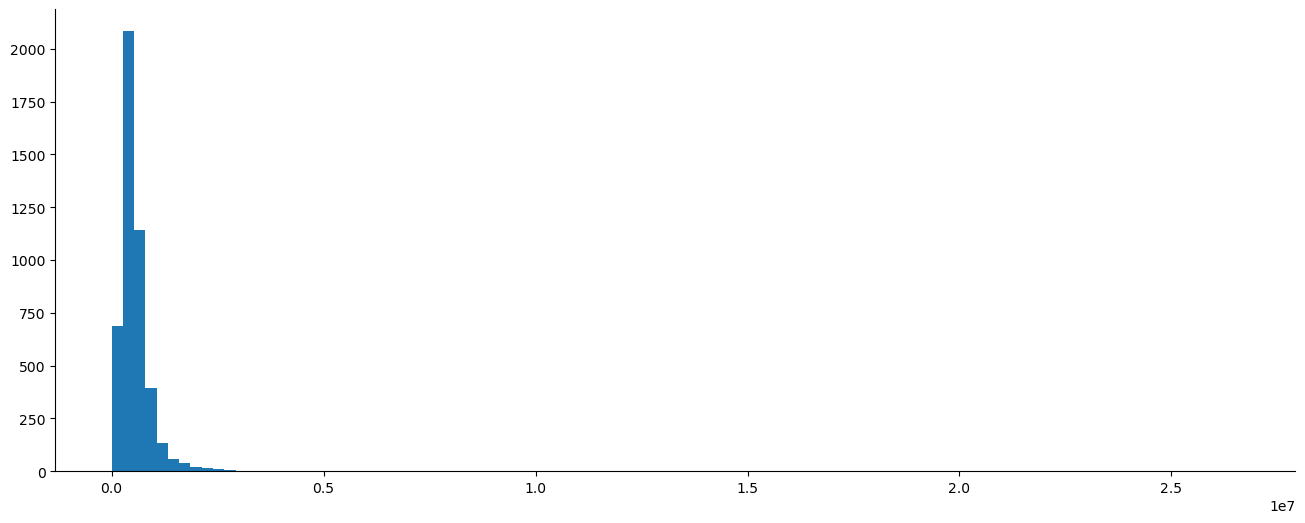

In [13]:
plt.hist(df['price'], bins=100);

In [14]:
from scipy import stats
import numpy as np

df['price_z'] = np.abs(stats.zscore(df['price']))
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,city,house_age,was_renovated,was_renovated_10_yrs,was_renovated_30_yrs,price_z
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,Shoreline,67,1,0,1,0.423864
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,Seattle,101,0,0,0,3.249598
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,Kent,56,0,0,0,0.372424
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,Bellevue,59,0,0,0,0.234071
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,Redmond,46,1,0,1,0.003482


In [15]:
df = df[df['price_z'] <= 3]
df.shape

(4566, 17)

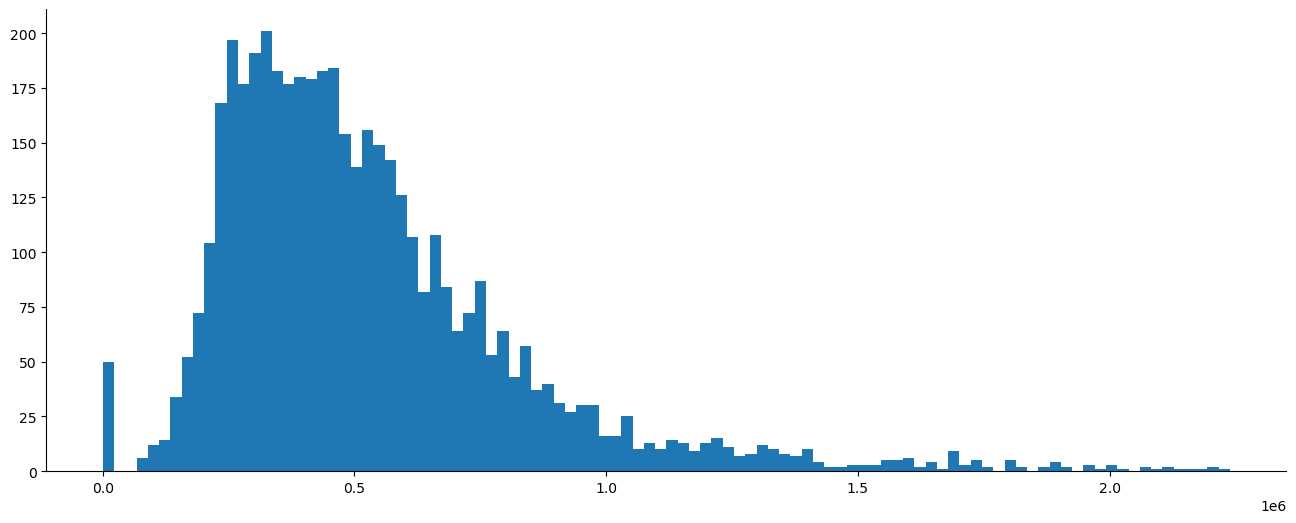

In [16]:
plt.hist(df['price'], bins=100);

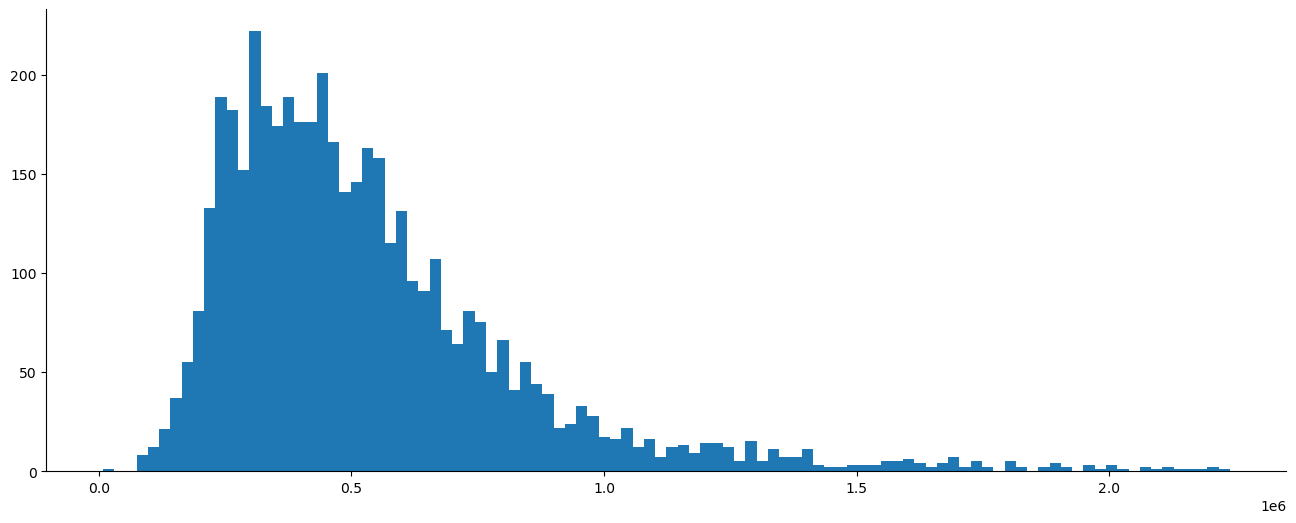

In [17]:
# Still a bit of skew present
# There seem to be houses selling for $0
# Let's remove them:
df = df[df['price'] != 0]

plt.hist(df['price'], bins=100);

In [18]:
df = df.drop('price_z', axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,city,house_age,was_renovated,was_renovated_10_yrs,was_renovated_30_yrs
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,Shoreline,67,1,0,1
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,Kent,56,0,0,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,Bellevue,59,0,0,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,Redmond,46,1,0,1
5,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,Seattle,84,1,0,1


## Data preparation for ML

In [19]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

transformer = make_column_transformer(
    (StandardScaler(), ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'house_age']),
    (OneHotEncoder(handle_unknown='ignore'), ['bedrooms', 'bathrooms', 'floors', 'view', 'condition'])
)

In [20]:
from sklearn.model_selection import train_test_split

X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((3613, 15), (904, 15))

In [21]:
# Fit on the train set
transformer.fit(X_train)

# Apply the transformation
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

In [22]:
X_train.shape, X_test.shape

((3613, 53), (904, 53))

In [23]:
X_train = X_train.toarray()
X_test = X_test.toarray()

## Model training

In [24]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

In [25]:
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [26]:
tf.random.set_seed(42)

model = Sequential()
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1))

model.compile(loss='mse', optimizer=Adam())
history=model.fit(X_train, y_train, epochs=20, validation_split = 0.1)

Metal device set to: Apple M1
Epoch 1/20


2022-08-24 13:00:09.771571: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-24 13:00:09.771658: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-08-24 13:00:09.822096: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


 13/102 [==>...........................] - ETA: 0s - loss: 351829884928.0000 

2022-08-24 13:00:10.029510: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


102/102 [==============================] - 1s 5ms/step - loss: 373270675456.0000 - val_loss: 378889371648.0000
Epoch 2/20
 27/102 [======>.......................] - ETA: 0s - loss: 337004691456.0000

2022-08-24 13:00:10.631999: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


102/102 [==============================] - 0s 4ms/step - loss: 246650716160.0000 - val_loss: 105407471616.0000
Epoch 3/20
102/102 [==============================] - 0s 4ms/step - loss: 57884061696.0000 - val_loss: 59811917824.0000
Epoch 4/20
102/102 [==============================] - 0s 4ms/step - loss: 49001906176.0000 - val_loss: 54407970816.0000
Epoch 5/20
102/102 [==============================] - 0s 4ms/step - loss: 46454468608.0000 - val_loss: 52043124736.0000
Epoch 6/20
102/102 [==============================] - 1s 5ms/step - loss: 44967514112.0000 - val_loss: 50958372864.0000
Epoch 7/20
102/102 [==============================] - 0s 5ms/step - loss: 44023484416.0000 - val_loss: 49256685568.0000
Epoch 8/20
102/102 [==============================] - 1s 5ms/step - loss: 43499986944.0000 - val_loss: 48679600128.0000
Epoch 9/20
102/102 [==============================] - 0s 4ms/step - loss: 42968981504.0000 - val_loss: 48252895232.0000
Epoch 10/20
102/102 [============================

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               13824     
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 112,641
Trainable params: 112,641
Non-trainable params: 0
_________________________________________________________________


In [28]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
15,4.159776e+10,4.569121e+10,15
16,4.156429e+10,4.594979e+10,16
17,4.135833e+10,4.578209e+10,17
18,4.148441e+10,4.598540e+10,18
19,4.128862e+10,4.526526e+10,19


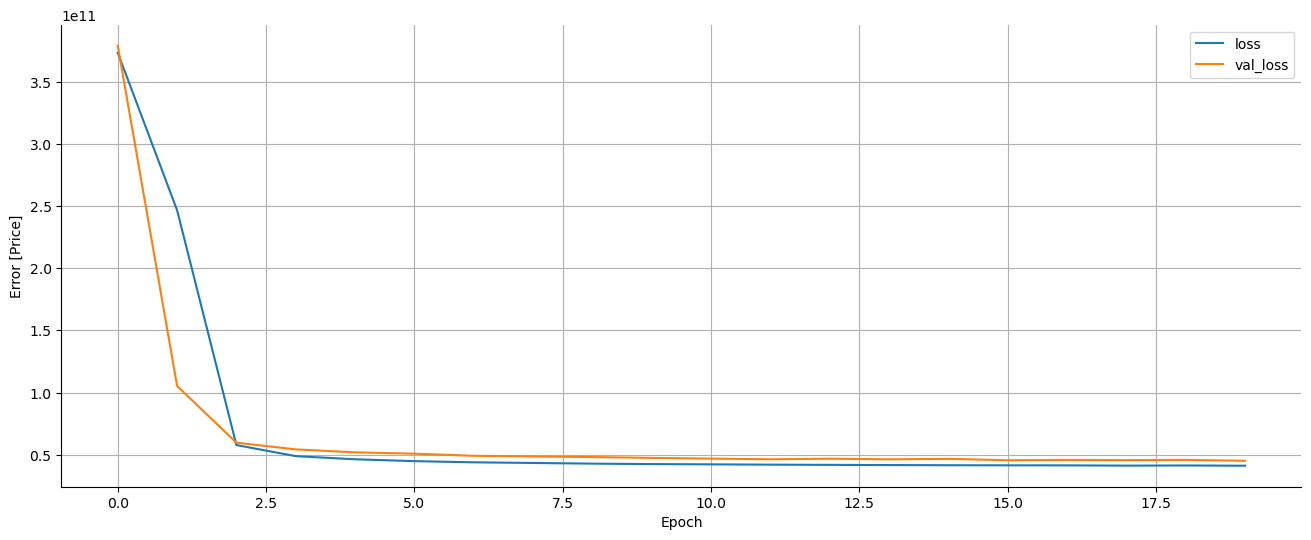

In [29]:
import matplotlib.pyplot as plt

def plot_loss(history):
    plt.plot(history['loss'], label='loss')
    plt.plot(history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error [Price]')
    plt.legend()
    plt.grid(True)

plot_loss(hist)

## Testing

In [30]:
predictions = model.predict(X_test)
predictions[:5]

29/29 [==============================] - 0s 2ms/step


2022-08-24 13:00:19.739377: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[ 496124.6 ],
       [ 603740.5 ],
       [1187631.8 ],
       [ 264373.5 ],
       [ 323894.06]], dtype=float32)

In [31]:
predictions = np.ravel(predictions)
predictions[:5]

array([ 496124.6 ,  603740.5 , 1187631.8 ,  264373.5 ,  323894.06],
      dtype=float32)

In [32]:
rmse(y_test, predictions).numpy()

191068.44104133785